<a href="https://colab.research.google.com/github/parthdasawant/Fashion_MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNs camparision using Fashion MNIST


> **Assignment Question 3: Image Classification with CNNs** \
Implement a convolutional neural network (CNN) for image classification using a dataset of your choice (e.g., CIFAR-10, Fashion MNIST). The goal is to correctly classify images into predefined categories. Experiment with different architectures, and provide a comparative analysis of model performance. Include documentation explaining the rationale behind your architectural choices and any tuning performed.


The objective of this project is to implement a convolutional neural network (CNN) for image classification using the Fashion MNIST dataset within a Google Colab environment. The primary aim is to accurately classify images of fashion items into predefined categories. This documentation provides insights into the architectural choices made, hyperparameter tuning strategies employed, and a comparative analysis of model performance.

Fashion MNIST, a dataset containing 70,000 grayscale images of fashion items, is utilized for this project. Each image is 28x28 pixels, making it suitable for training and evaluating CNNs in a Colab environment.

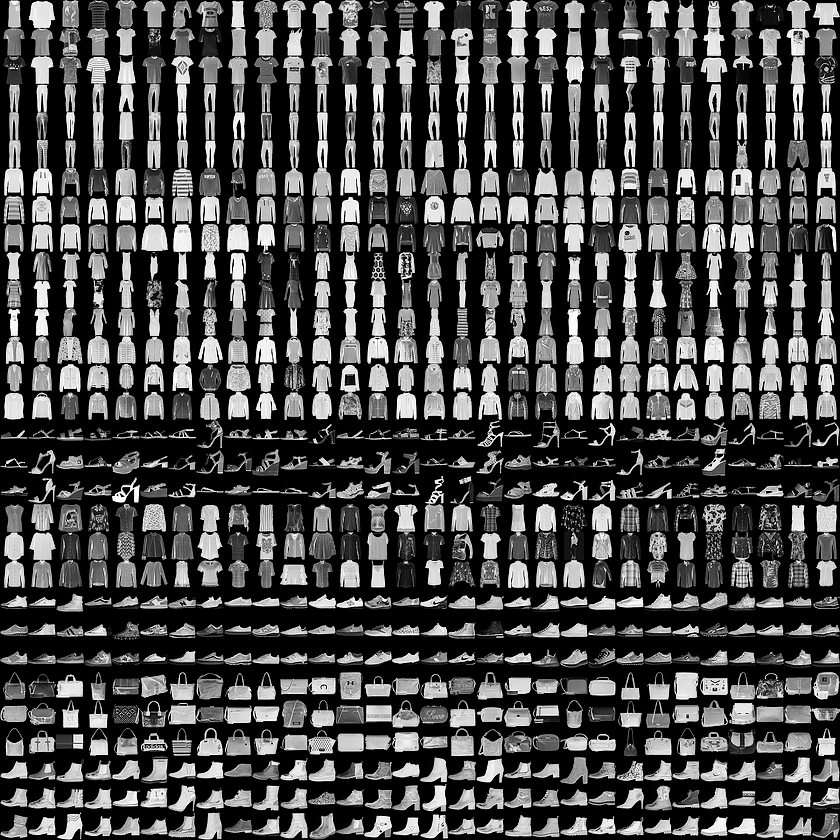






1. **LeNet-5:** This classic architecture is chosen for its simplicity and effectiveness on smaller datasets like Fashion MNIST. LeNet-5 comprises convolutional and pooling layers followed by fully-connected layers, making it suitable for basic image classification tasks within the constraints of Colab's computational resources. Two convolutional layers followed by max-pooling layers, and then fully-connected layers with ReLU activation functions.

2. **VGG16:** Despite its deeper architecture, VGG16 is selected for its proven performance on similar tasks like CIFAR-10. While VGG16 may be prone to overfitting on smaller datasets, it offers a strong baseline for comparison within the Colab environment. Multiple convolutional blocks with 3x3 filters, followed by max-pooling layers and fully-connected layers with ReLU activation functions. Dropout layers are added to mitigate overfitting.

3. **ResNet-18:** ResNet-18 is included for its residual connections, which help mitigate the vanishing gradient problem. Its architecture, featuring multiple residual blocks with shortcut connections, is expected to provide stable training and good accuracy even within the resource constraints of Colab. Residual blocks with shortcut connections, followed by global average pooling and a dense layer with softmax activation for classification.

4. **MobileNetV2:** MobileNetV2 is chosen as a lightweight architecture optimized for mobile devices. With depthwise separable convolutions and inverted residual blocks, it offers efficiency without compromising on accuracy, making it suitable for deployment in resource-constrained environments like Colab. Depthwise separable convolutions and inverted residual blocks, ending with a global average pooling layer and a dense layer with softmax activation.





## Import Packages & Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, datasets
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential, load_model
from keras.applications import VGG16, ResNet50, MobileNetV2

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools, subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

from IPython.display import Image
from keras.utils import plot_model

print(tf.__version__)

2.15.0


## Parameters

In [2]:
size = (32, 32)
epochs = 20 #@param {type: "number"}
batch_size = 128

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Dataset Loading & Pre-processing

In [3]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to images
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


# Resize images to (32, 32)
train_images = tf.image.resize(train_images, size)
test_images = tf.image.resize(test_images, size)

4422102/4422102 [==============================] - 0s 0us/step


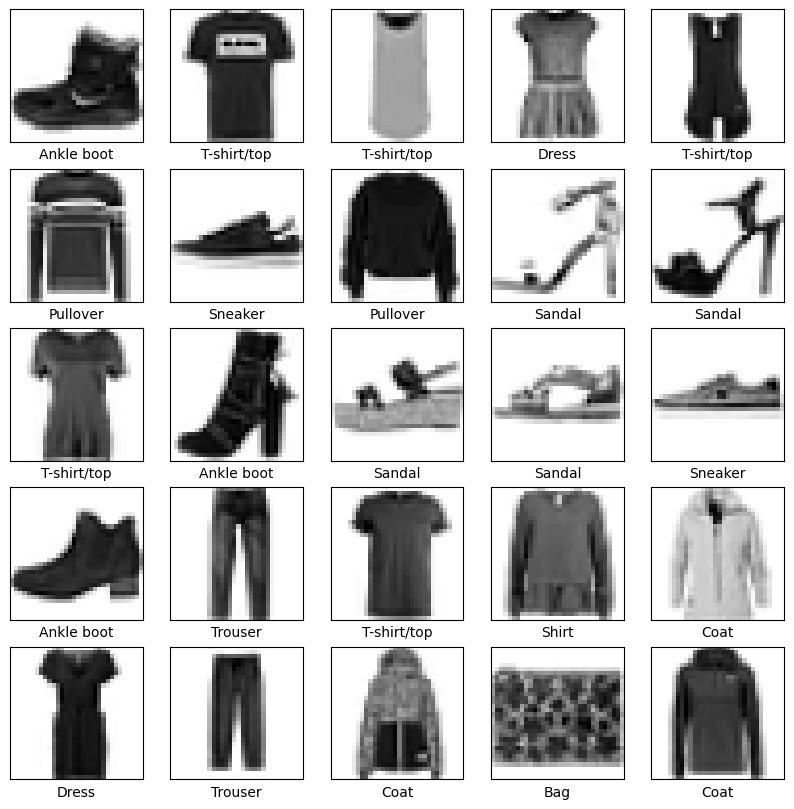

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Architecture Definitions

In [12]:
from keras.models import Model

# Define LeNet-5 architecture
def LeNet5():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10)
    ])
    return model

# Define VGG16 architecture
# def VGG16Model():
#     base_model = VGG16(weights=None, input_shape=(32, 32, 1), include_top=False)
#     model = Sequential([
#         base_model,
#         Flatten(),
#         Dense(512, activation='relu'),
#         Dropout(0.5),
#         Dense(512, activation='relu'),
#         Dropout(0.5),
#         Dense(10, activation='softmax')
#     ])
#     return model

def VGG16Model(input_shape=(32, 32, 1), num_classes=10):
    # Load pre-trained VGG16 model
    base_model = VGG16(weights=None, include_top=False, input_shape=input_shape)

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of VGG16
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Combine base model and custom layers
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define ResNet-18 architecture
def ResNet18():
    base_model = ResNet50(weights=None, input_shape=(32, 32, 1), include_top=False)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(10, activation='softmax')
    ])
    return model

# Define MobileNetV2 architecture
def MobileNetV2Model():
    base_model = MobileNetV2(weights=None, input_shape=(32, 32, 1), include_top=False)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(10, activation='softmax')
    ])
    return model

## Helper Functions

In [13]:
# Compile and train the model
def train_model(name, model, train_images, train_labels, test_images, test_labels, epochs=epochs, batch_size=batch_size):
    if name == 'ResNet-18' or name == 'MobileNetV2' or name == 'VGG16':
        from_logits = False
    else:
        from_logits = True
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits),
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))
    return history

# Evaluate model
def evaluate_model(name, model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy of {name}: ", test_acc)

In [7]:
# Confusion matrix
def plot_confusion_matrix(ax, model_name, y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    im = ax.imshow(cm, interpolation='nearest', cmap='Pastel2')
    ax.set_title(f'Confusion Matrix of {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_names)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            ax.text(y, x, str(cm[x][y]), horizontalalignment='center', verticalalignment='center')

    # Add color bar on the right side
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel('Counts', rotation=-90, va='bottom')


In [8]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  confidence = 100 * np.max(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                confidence,
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10), rotation=90)
  plt.yticks([])
  thisplot = plt.bar(class_names, predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

In [9]:
def model_to_image(name, model):
  plot_model(model, show_shapes=True, to_file=f'{name}.png')
  return f'{name}.png'

## Architecutures List

In [14]:
# Load model architectures
models = [LeNet5(), VGG16Model(), ResNet18(), MobileNetV2Model()]
model_names = ['LeNet-5', 'VGG16', 'ResNet-18', 'MobileNetV2']

# models = [VGG16Model(), VGG16Model2()]
# model_names = ['VGG16', 'v2']


## Model training

In [15]:
trained_history = []
# Train and evaluate models
for model, name in zip(models, model_names):
    print("-" * 40+f"START OF TRANING {name}"+"-" * 40)
    history = train_model(name, model, train_images, train_labels, test_images, test_labels)
    evaluate_model(name, model, test_images, test_labels)
    trained_history.append(history)
    print("-" * 40+f"END OF TRANING {name}"+"-" * 40)
    print("")





----------------------------------------START OF TRANING LeNet-5----------------------------------------
Epoch 1/20
469/469 [==============================] - 6s 9ms/step - loss: 0.6541 - accuracy: 0.7632 - val_loss: 0.4955 - val_accuracy: 0.8247
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4235 - accuracy: 0.8490 - val_loss: 0.4161 - val_accuracy: 0.8469
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3659 - accuracy: 0.8677 - val_loss: 0.3917 - val_accuracy: 0.8599
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3336 - accuracy: 0.8771 - val_loss: 0.3460 - val_accuracy: 0.8747
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3111 - accuracy: 0.8863 - val_loss: 0.3630 - val_accuracy: 0.8699
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.2950 - accuracy: 0.8932 - val_loss: 0.3177 - val_accuracy: 0.8876
Epoch 7/20
469/469 [=====================

## Model Validation & Testing


### Accuracy & Loss during Training & Validation

In [16]:

def create_trace(x, y, ylabel, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=ylabel,
        marker=dict(color=color),
        mode="markers+lines",
        text=x
    )
    return trace

def plot_accuracy_and_loss(name, train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    trace_ta = create_trace(epochs, acc, "Training accuracy", "Green")
    trace_va = create_trace(epochs, val_acc, "Validation accuracy", "Red")
    trace_tl = create_trace(epochs, loss, "Training loss", "Blue")
    trace_vl = create_trace(epochs, val_loss, "Validation loss", "Magenta")

    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))

    fig.append_trace(trace_ta, 1, 1)
    fig.append_trace(trace_va, 1, 1)
    fig.append_trace(trace_tl, 1, 2)
    fig.append_trace(trace_vl, 1, 2)
    fig['layout']['xaxis'].update(title='Epoch')
    fig['layout']['xaxis2'].update(title='Epoch')
    fig['layout']['yaxis'].update(title='Accuracy')
    fig['layout']['yaxis2'].update(title='Loss')

    fig.update_layout(title_text=f'{name}')
    iplot(fig, filename='accuracy-loss')

for name, history in zip(model_names, trained_history):
    plot_accuracy_and_loss(name, history)


### Confusion Matrices

313/313 [==============================] - 3s 7ms/step


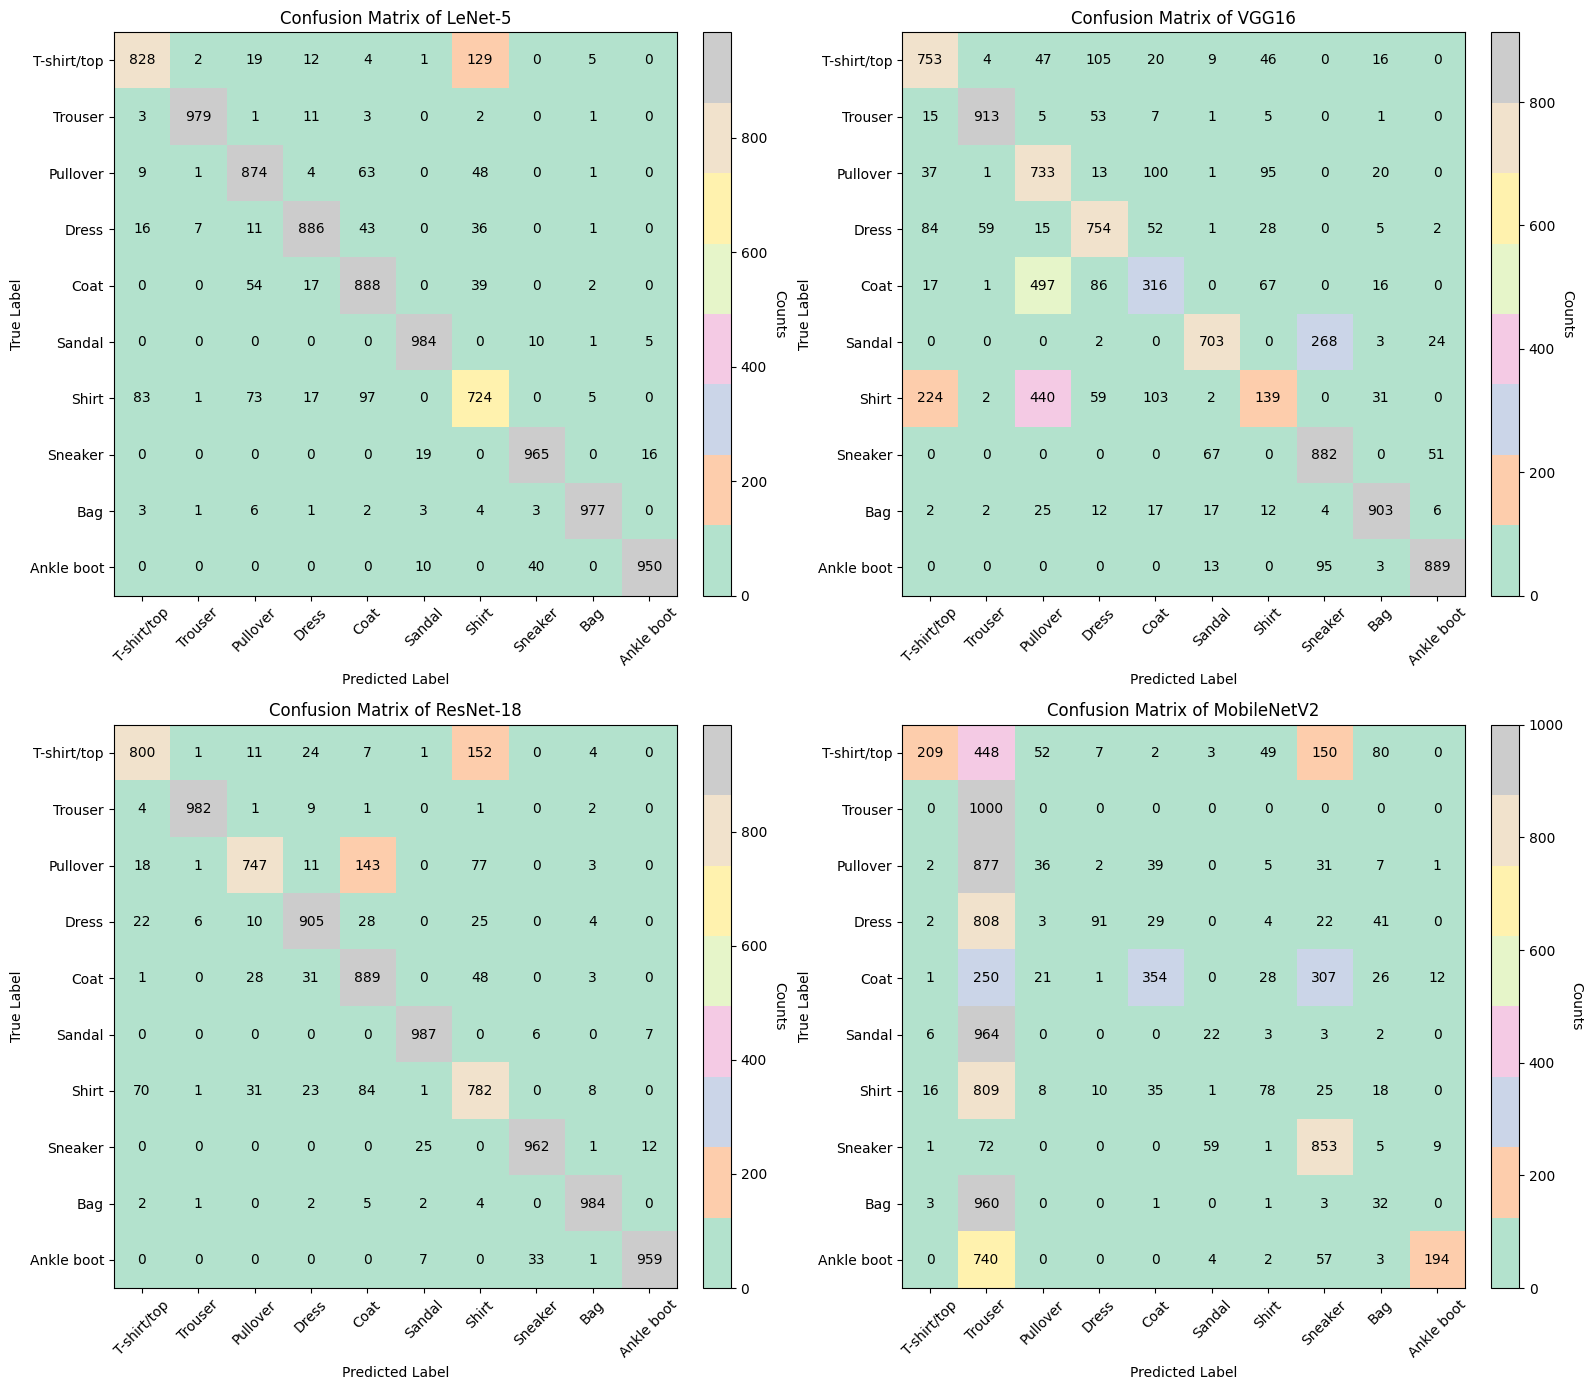

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for model, name, history, ax in zip(models, model_names, trained_history, axes.flatten()):
    # Confusion matrix
    predictions = np.argmax(model.predict(test_images), axis=1)
    plot_confusion_matrix(ax, name, test_labels, predictions, class_names)


plt.tight_layout()
plt.show()

### Verify predictions

313/313 [==============================] - 1s 2ms/step


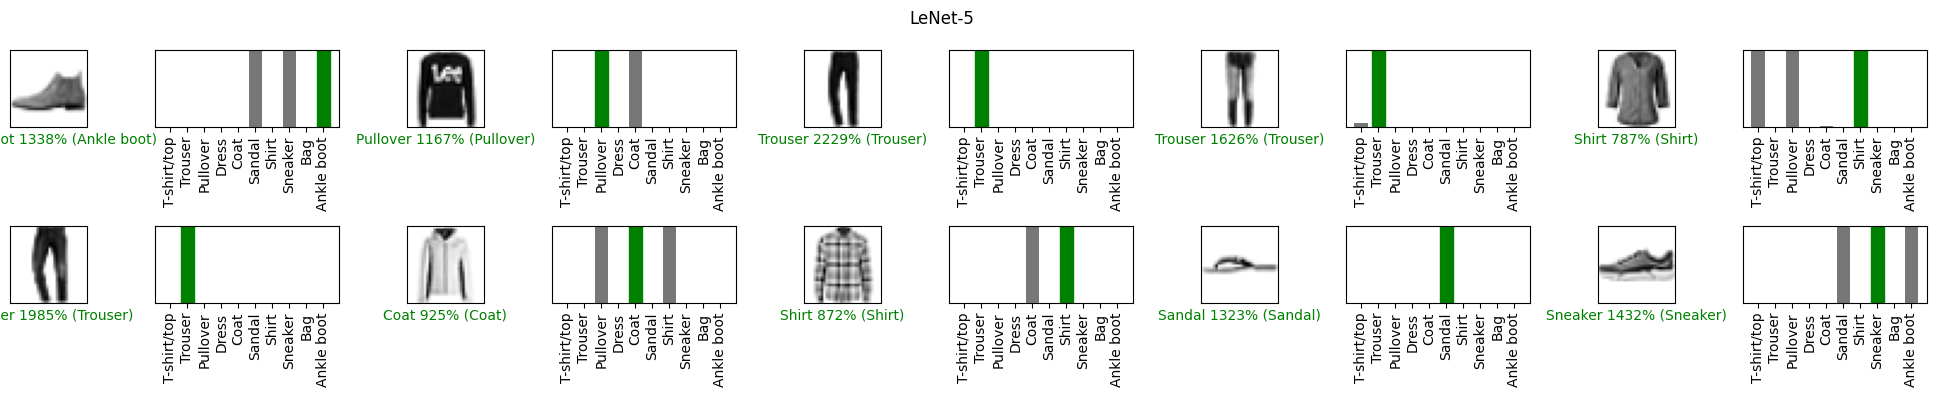

313/313 [==============================] - 2s 7ms/step


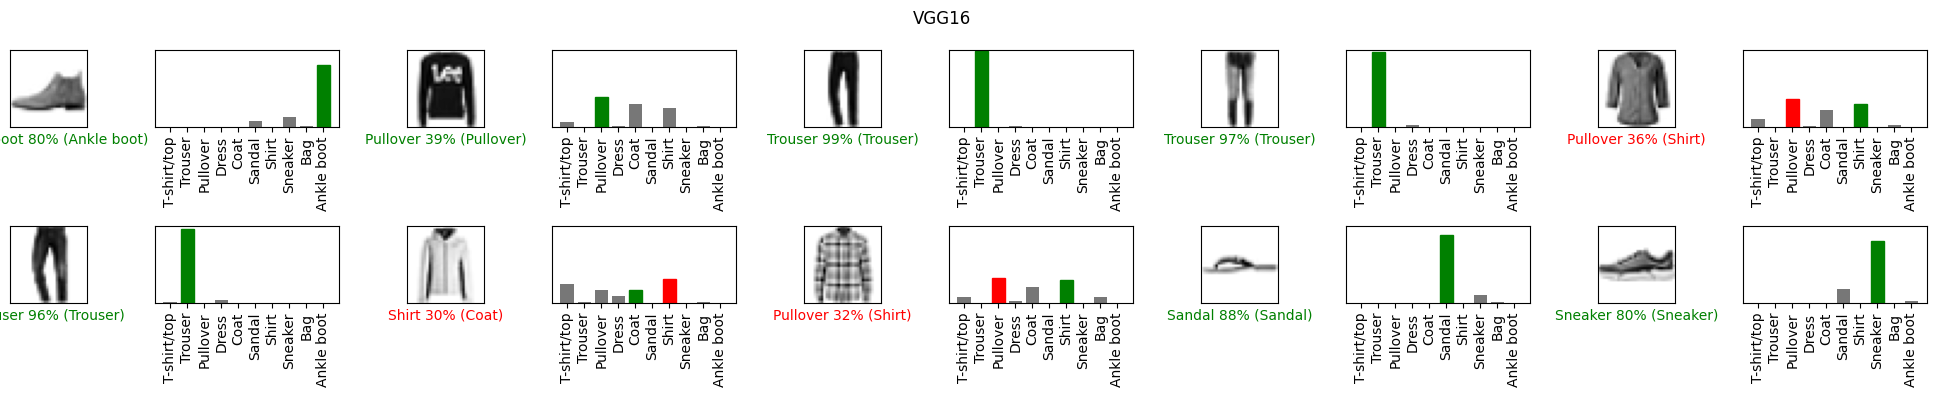

313/313 [==============================] - 4s 12ms/step


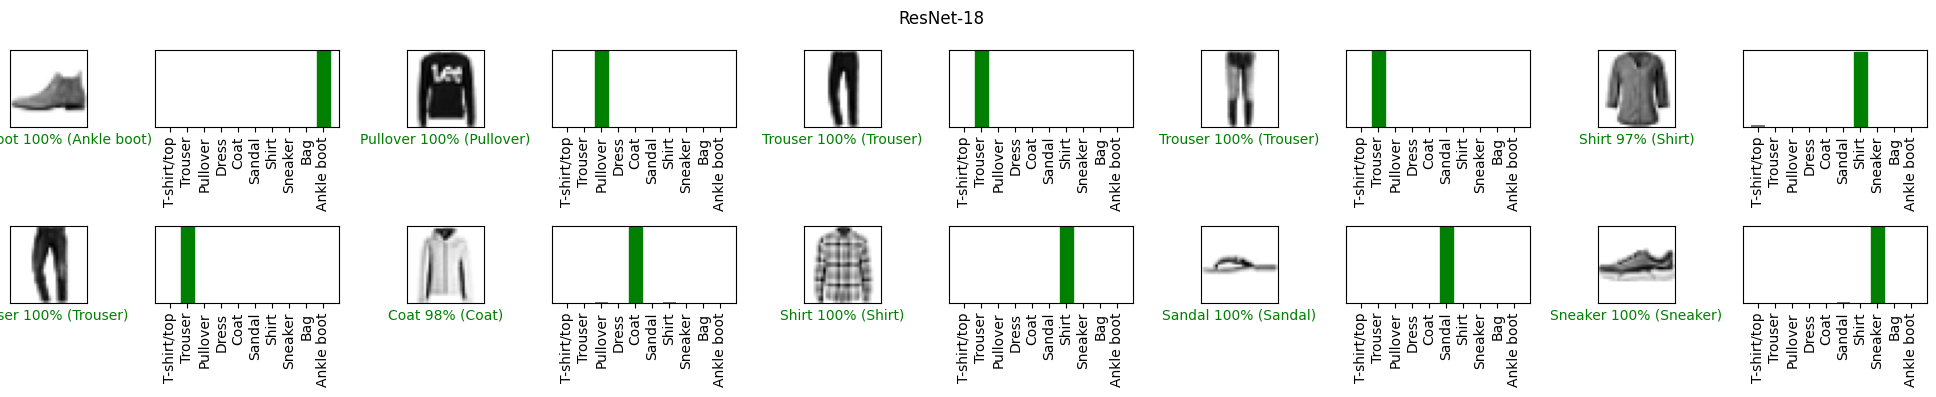

313/313 [==============================] - 3s 8ms/step


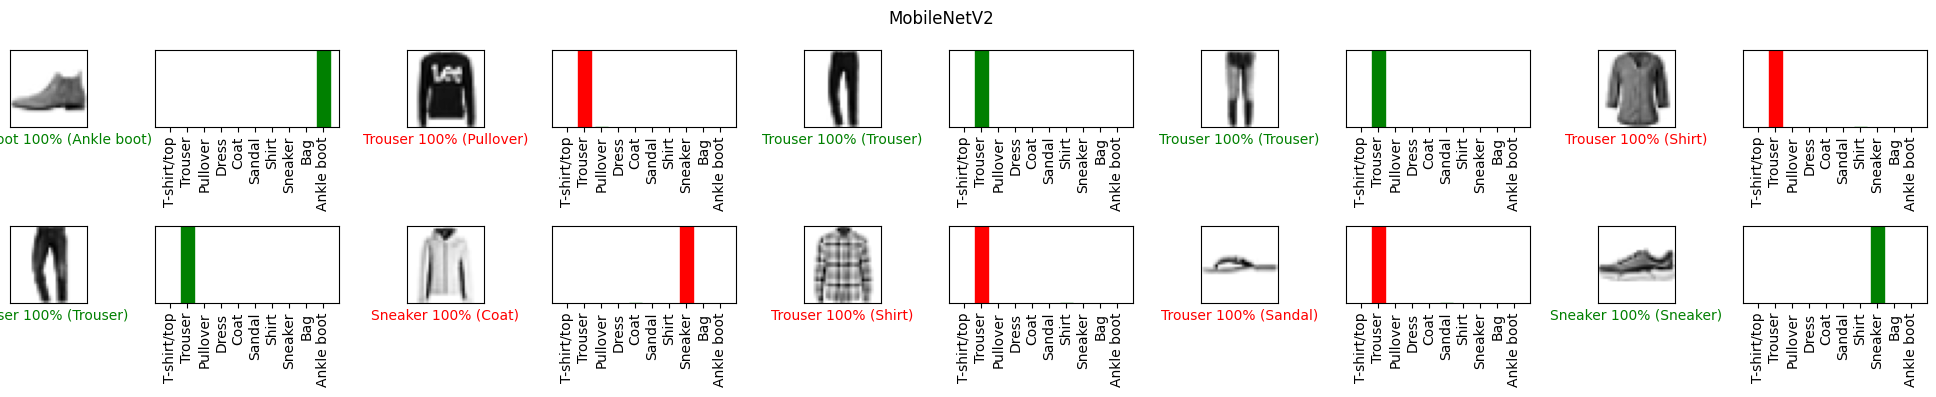

In [18]:
for model, name, history in zip(models, model_names, trained_history):
    predictions = model.predict(test_images)
    num_rows = 2
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    plt.suptitle(name)
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()

### Performance Stats Table

In [19]:
metrics = []
for name, history in zip(model_names, trained_history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    metrics.append({'Model': name, 'Accuracy': acc[-1], 'Validation Accuracy': val_acc[-1], 'Loss': loss[-1], 'Validation Loss': val_loss[-1]})

# Create DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)



         Model  Accuracy  Validation Accuracy      Loss  Validation Loss
0      LeNet-5  0.937500               0.9055  0.168247         0.274536
1        VGG16  0.660450               0.6985  0.871036         0.781116
2    ResNet-18  0.944833               0.8997  0.147844         0.298639
3  MobileNetV2  0.937617               0.2869  0.170733        72.563591


### Visual Representation of the Performances

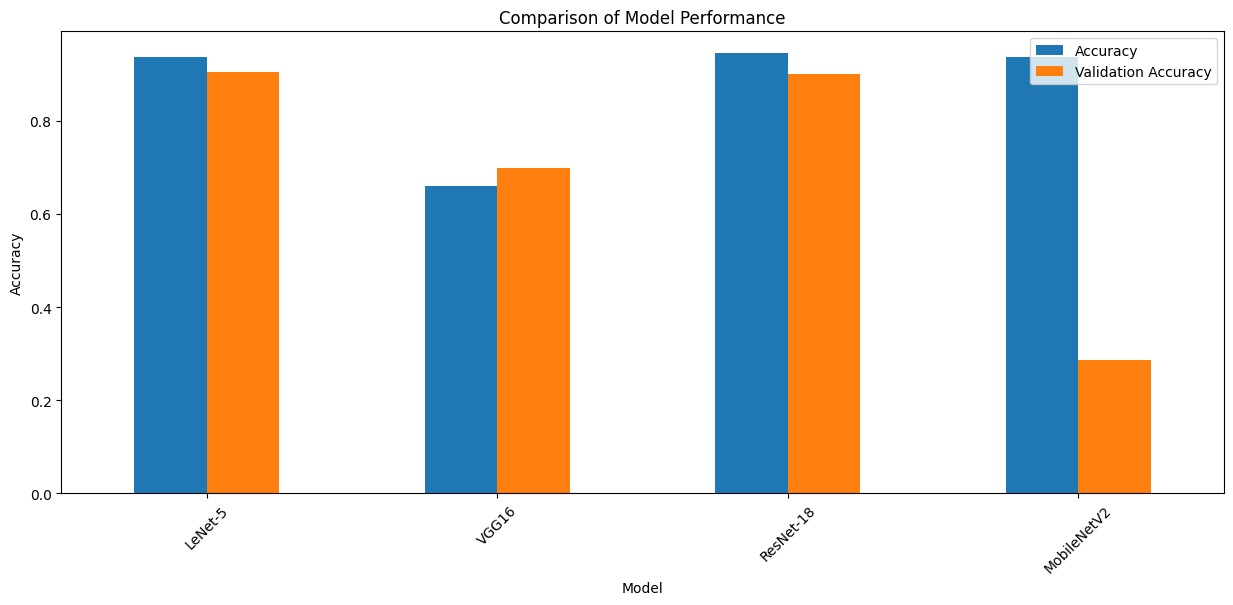

In [21]:
# Plot a bar chart comparing accuracy and validation accuracy
metrics_df.plot(x='Model', y=['Accuracy', 'Validation Accuracy'], kind='bar', figsize=(15, 6))
plt.title('Comparison of Model Performance')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

## Comparative Analysis
A comparative analysis of model performance based on accuracy, training time, and resource consumption is conducted. Visualizations such as confusion matrices and feature maps are utilized to gain insights into model behavior and identify potential areas for improvement.



## Conclusion
In conclusion, this project explores different CNN architectures for image classification on the Fashion MNIST dataset within the Google Colab environment. Each architecture is carefully chosen and tuned to optimize performance. The comparative analysis provides valuable insights into the strengths and weaknesses of each model, aiding in the selection of the most suitable architecture for the task at hand. Future work may involve further experimentation with hyperparameters and architectures to improve model performance within the resource constraints of Colab.